Q2
Accuracy - This measures how "correct" your model is, overall. It finds the ratio of correct guesses to total guesses. A use-case would be if a company wanted to evaluate if its reviews were positive or negative. In this instance, neither outcome is necessarily more important to predict, so accuracy would be a good catch-all metric.

Sensitivity - This measures the model's ability to detect positives, by finding the ratio of true positive guesses to the total number of positives. A use-case would be in medical tests, where detecting a disease is of critical importance, and not detecting it is often disastrous.

Specificity - This measures the model's ability to detect negatives, by finding the ratio of true negative guesses to the total number of negatives. A use-case would be in spam detection, where verifying negatives properly prevents blocking any genuine messages.

Precision - This measures the ratio of true positives to the number of positive guesses, so high precision means that most of the positive guesses are correct. A use-case would be in fraud detection, where it's important not to convict/prosecute the innocent.

In [73]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
#ab.describe()
del ab["Weight_oz"], ab["Height"], ab["Width"]
ab_reduced_noNaN = ab.dropna()
#print(ab_reduced_noNaN.shape)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

np.random.seed(130)
ab_reduced_noNaN_train,ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN,train_size=int(ab_reduced_noNaN.shape[0]*0.8),)
#print(ab_reduced_noNaN_train.shape)
#print(ab_reduced_noNaN_test.shape)
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test = ab_reduced_noNaN_test[['List Price']]
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
#tree.plot_tree(clf)

DecisionTreeClassifier(max_depth=2)

Q4:
the training set has 255 observations (80%)
the test set has 64 observations (20%)
the original set has 319 observations, so our split is working

Based on the decision tree model, fitted to the training data, if the price is between 0 and 10.8, the model predicts paperback. If price is between 10.8 and 17.97, model predicts paperback. If price above 29.48, model predicts paperback. If the price is between 19.97 and 29.48, model predicts hardcover.

In [74]:
y_train_2 = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train_2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_test_2 = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test_2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X_train_2, y_train_2)
#tree.plot_tree(clf2)

DecisionTreeClassifier(max_depth=4)

Text(0.5, 1.0, 'Confusion Matrix for clf2')

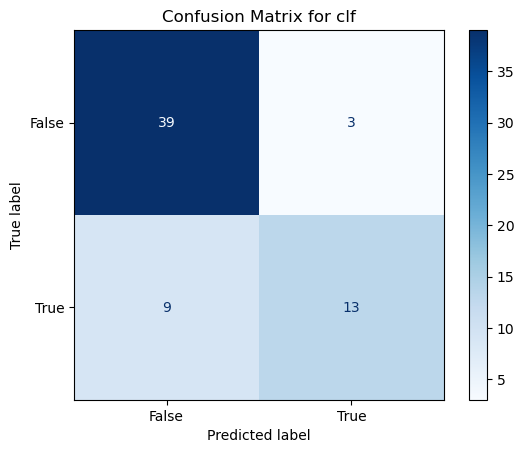

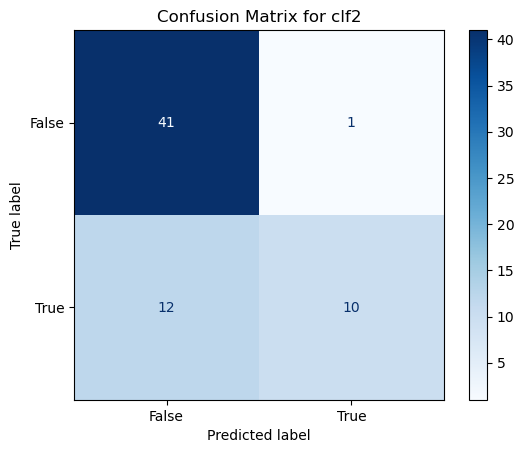

In [75]:
# Step 1: Make predictions for both models
y_pred_clf = clf.predict(X_test)  # Predictions from clf
y_pred_clf2 = clf2.predict(X_test_2)  # Predictions from clf2
# Confusion Matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test_2, y_pred_clf2)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_)
disp_clf.plot(cmap="Blues", values_format="d")
disp_clf.ax_.set_title("Confusion Matrix for clf")

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=clf2.classes_)
disp_clf2.plot(cmap="Blues", values_format="d")
disp_clf2.ax_.set_title("Confusion Matrix for clf2")

In [72]:
# Sensitivity, Specificity, and Accuracy for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = tp_clf / (tp_clf + fn_clf)  # True Positive Rate (Sensitivity)
specificity_clf = tn_clf / (tn_clf + fp_clf)  # True Negative Rate (Specificity)

print("Model clf Metrics:")
print(f"Accuracy: {accuracy_clf:.2f}")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}\n")

# Sensitivity, Specificity, and Accuracy for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
accuracy_clf2 = accuracy_score(y_test_2, y_pred_clf2)
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)

print("Model clf2 Metrics:")
print(f"Accuracy: {accuracy_clf2:.2f}")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")

Model clf Metrics:
Accuracy: 0.81
Sensitivity: 0.59
Specificity: 0.93

Model clf2 Metrics:
Accuracy: 0.80
Sensitivity: 0.45
Specificity: 0.98


Q6: For clf: Accuracy: 0.81, Sensitivity: 0.59, Specificity: 0.93. For clf2: Accuracy: 0.80, Sensitivity: 0.45, Specificity: 0.98

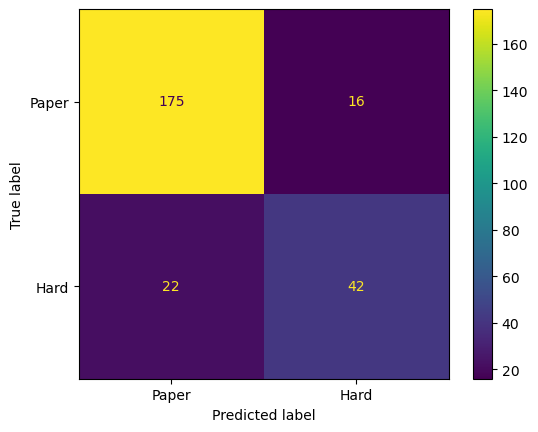

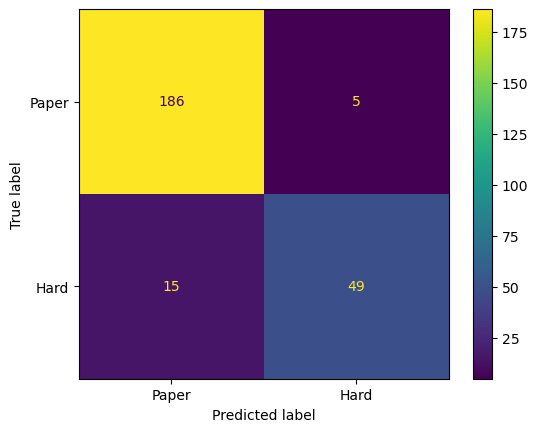

In [79]:
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H'], 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H'], 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

Q7:

We see wildly different confusion matrices when comparing the ones provided with the ones I coded up with chat. This happens because we are creating the matrices on distinct sets. In Q6, we were using the test data to create and compare predictions. In Q7, we are using the train data. Since the models themselves were trained on the train data, they are biased towards making correct guesses when compared against that dataset. The test data matrices are "better" because they are built using data the models haven't yet seen, showing how the models generalize.

ChatBot Summary for Q2, Q4, Q6, and Q7: https://chatgpt.com/share/673fd6ac-5b98-8010-a536-e185df22168b
Here’s a summary of our conversation for your homework assignment:

Q2, Q4:
### **1. Classification Decision Tree**
- A **Classification Decision Tree** is a machine learning algorithm used for classifying data based on input features. It builds a model by splitting data into nodes based on feature values to classify the target variable.

### **2. Accuracy, Sensitivity, Specificity, and Precision in Decision-Making**
- **Accuracy** measures the overall percentage of correct predictions.
- **Sensitivity (Recall)** measures the proportion of actual positive cases correctly identified by the model.
- **Specificity** measures the proportion of actual negative cases correctly identified by the model.
- **Precision** measures the proportion of positive predictions that are actually correct.

### **3. Example for Accuracy**
- Accuracy would be a good metric in cases where the classes are balanced, like predicting whether an email is spam or not, as the focus is on the overall correct predictions.

### **4. Dropping Columns and Handling NaN in Data**
- Use `del df["column_name"]` to delete a column from the DataFrame.
- To drop rows with NaN values, use `df.dropna(inplace=True)`.

### **5. Changing Data Types in a DataFrame**
- You can change data types using `.astype()`. For example, `df["column"] = df["column"].astype(int)` to convert a column to integers.

### **6. Using the Category Data Type**
- You can use `.astype("category")` to convert a column to a categorical data type, which is more memory-efficient for categorical variables.

### **7. Creating an 80-20 Split Using `train_test_split()`**
- Use `train_test_split(X, y, test_size=0.2)` to create an 80-20 train-test split.

### **8. Code for Training a Decision Tree Classifier**
- A Decision Tree Classifier was trained using `List Price` as the feature to predict whether a book is hardcover or paperback, with a `max_depth` of 2. 
- The model's performance was evaluated using accuracy.

### **9. Interpretation of Gini Index**
- The **Gini Index** measures the impurity of a node in a decision tree. A Gini value of 0 indicates a pure node (all instances belong to the same class), and 1 indicates a completely impure node (classes are evenly distributed).

### **10. Final Model**
- We discussed training a **DecisionTreeClassifier** using `List Price` as the feature to predict the target class (`Hard_or_Paper`) with a `max_depth` of 2 and evaluated its performance.

This summary covers the key points we discussed and the steps involved in implementing a decision tree classifier for your homework assignment. Let me know if you'd like any further details!

Q6, Q7:
Here’s a summary of our recent conversation for your homework assignment:

1. **Training a Classification Tree Model**:  
   You trained two decision tree classifiers, `clf` and `clf2`. The first model used only the feature `List Price`, while the second used multiple features: `NumPages`, `Thick`, and `List Price`. This highlighted the difference in feature selection during model training.

2. **Feature Mismatch Error**:  
   A ValueError occurred because `clf2` was trained on `['NumPages', 'Thick', 'List Price']`, but predictions were initially attempted using a different feature set. This was resolved by aligning training and testing features.

3. **Confusion Matrices and Performance Metrics**:  
   You created confusion matrices for both models (`clf` and `clf2`) using the test set and computed their accuracy, sensitivity, and specificity. The results provided insight into the predictive performance of each model, with `clf2` generally expected to perform better due to using more features.

4. **Training Data Predictions**:  
   You examined confusion matrices generated using training data for both models and observed that they likely overestimated performance. Using test data is better for evaluating generalization performance.

5. **Target Variable Integration**:  
   For confusion matrix calculations, you confirmed that the target variable should be encoded as a binary format (e.g., `pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']`) to align with model outputs.

Let me know if you’d like any clarification or more details added!